In [25]:
import numpy as np
import pandas as pd
import random
import json
import csv
import math
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import urllib
from forecastiopy import *

In [19]:
Culver = [34.021122, -118.396466]
API_KEY = '923677cb33071713bf086cd0fef8aac2'

#Variable represents the UNIX time of January 1, 2010
var2010 = 1262360341

#Adding this to var2010 will advance the unix time by one day
addADay = 86400

file2 = open('weather.csv', 'wt')

try:
    writer = csv.writer(file2)
    writer.writerow(('PRCP', 'TMAX', 'TMIN'))
    
    
    for i in range(365):
        response = urllib.request.urlopen('https://api.darksky.net/forecast/923677cb33071713bf086cd0fef8aac2/37.8267,-122.4233,'+ str(var2010))

        #Converts HTTPResponse object to string
        string = response.read().decode('utf-8')

        #Creates initial json data
        json_obj = json.loads(string)

        #Format json data
        #jsson = json.dumps(json_obj, indent = 4)
        #print(jsson)


        prcp = str(json_obj['daily']['data'][0]['precipIntensity'])
        tmaxx = str(json_obj['daily']['data'][0]['apparentTemperatureMax'])
        tminn = str(json_obj['daily']['data'][0]['apparentTemperatureMin'])
        
        writer.writerow((prcp, tmaxx, tminn))
        var2010 += addADay
finally:
    file2.close()

#Write to json file
#with open('data.json', 'w') as f:
     #json.dump(jsson, f)

In [21]:
x = pd.read_csv('2010weather.csv');
#Add a new column SNR(Signal Noise Ratio) using our formula y = -80x - 20
x['SNR'] = x['PRCP'].apply(lambda r: (r * -80) - 20)
print(x)

       PRCP   TMAX   TMIN  SIGLVL     SNR
0    0.0011  55.52  51.15      66 -20.088
1    0.0002  54.72  50.21      61 -20.016
2    0.0000  53.27  42.25      64 -20.000
3    0.0000  53.41  43.27      61 -20.000
4    0.0000  52.30  41.70      62 -20.000
5    0.0000  50.85  40.45      68 -20.000
6    0.0000  45.58  40.83      60 -20.000
7    0.0001  50.98  41.26      63 -20.008
8    0.0000  51.26  43.01      60 -20.000
9    0.0000  50.68  39.90      63 -20.000
10   0.0000  53.11  40.50      64 -20.000
11   0.0092  58.85  53.00      65 -20.736
12   0.0050  58.29  50.83      67 -20.400
13   0.0000  56.33  44.57      63 -20.000
14   0.0000  53.51  45.59      68 -20.000
15   0.0027  54.06  46.27      66 -20.216
16   0.0049  54.39  51.52      66 -20.392
17   0.0325  55.79  51.27      61 -22.600
18   0.0385  55.64  44.29      65 -23.080
19   0.0363  53.64  42.95      65 -22.904
20   0.0289  51.82  37.85      70 -22.312
21   0.0105  49.80  39.37      70 -20.840
22   0.0128  53.44  41.26      60 

In [23]:
prcpMax = x['PRCP'].max()
sigMax = x['SIGLVL'].max()

snrMax = x['SNR'].max()
snrMin = x['SNR'].min()

tempMax = x['TMAX'].max()

tempMinMax = x['TMIN'].max()
tempMinMin = x['TMIN'].min()
x['NormPRCP'] = x['PRCP'].apply(lambda y: y / prcpMax)

x['NormTMAX'] = x['TMAX'].apply(lambda u: u / tempMax)

x['NormTMIN'] = x['TMIN'].apply(lambda e: (e - tempMinMin)/(tempMinMax - tempMinMin))

x['NormSNR'] = x['SNR'].apply(lambda d: (d - snrMin)/ (snrMax - snrMin))

x['logPRCP'] = x['NormPRCP'].apply(lambda i: (i ** (1 / 3)))
x['logSNR'] = x['NormSNR'].apply(lambda p: (p ** (1 / 3)))

print(x)

       PRCP   TMAX   TMIN  SIGLVL     SNR  NormPRCP  NormTMAX  NormTMIN  \
0    0.0011  55.52  51.15      66 -20.088  0.026570  0.620751  0.590734   
1    0.0002  54.72  50.21      61 -20.016  0.004831  0.611807  0.557740   
2    0.0000  53.27  42.25      64 -20.000  0.000000  0.595595  0.278343   
3    0.0000  53.41  43.27      61 -20.000  0.000000  0.597160  0.314145   
4    0.0000  52.30  41.70      62 -20.000  0.000000  0.584750  0.259038   
5    0.0000  50.85  40.45      68 -20.000  0.000000  0.568538  0.215163   
6    0.0000  45.58  40.83      60 -20.000  0.000000  0.509615  0.228501   
7    0.0001  50.98  41.26      63 -20.008  0.002415  0.569991  0.243594   
8    0.0000  51.26  43.01      60 -20.000  0.000000  0.573122  0.305019   
9    0.0000  50.68  39.90      63 -20.000  0.000000  0.566637  0.195858   
10   0.0000  53.11  40.50      64 -20.000  0.000000  0.593806  0.216918   
11   0.0092  58.85  53.00      65 -20.736  0.222222  0.657983  0.655669   
12   0.0050  58.29  50.83

<function matplotlib.pyplot.show>

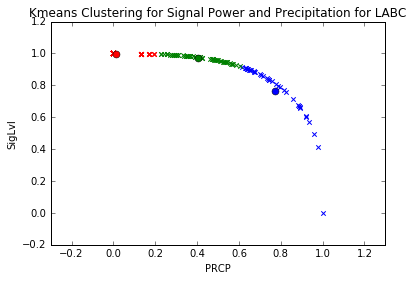

In [26]:
%matplotlib inline
kMeans = KMeans(n_clusters=3)
X = x[['logPRCP', 'logSNR']]
kMeans.fit(X)

# Assigned Labels after clustering: 
labels = kMeans.labels_

# Centers of the clusters:
centers = kMeans.cluster_centers_

plt.figure

for l, c in zip([0,1,2], ['red', 'blue', 'green']):
    
    current_members = (labels == l)
    current_center = centers[l]
    
    plt.scatter(X.iloc[current_members,0], X.iloc[current_members,1], color = c, marker='x')
    
    plt.plot(current_center[0], current_center[1], 'o', markerfacecolor = c,
            markeredgecolor = 'k', markersize=7)
    
plt.xlim([-0.3,1.3])

    
plt.xlabel('PRCP')
plt.ylabel('SigLvl')
plt.title('Kmeans Clustering for Signal Power and Precipitation for LABC in 2010')

plt.show

In [27]:
stdMeanFeats = ['NormTMIN', 'logPRCP', 'logSNR']
# stdMeanFeats = ['logPRCP', 'logSNR']
print("Standard Deviation:")
print(x[stdMeanFeats].std())

print("\nMean:")
print(x[stdMeanFeats].mean())



#NDvalues stores the normal distribution values of PRCP, then SNOW, then TMAX, etc.
i = 0
# NDvalues = [0, 0, 0, 0, 0, 0, 0]
NDvalues = [0,0,0]
for name in stdMeanFeats:
    z = 0
    e = 2.71
    denominator = math.sqrt(2 * (math.pow(x[name].std(), 2)) * math.pi) 
    numeratorOfPower = math.pow((z - x[name].mean()), 2)
    denominatorOfPower = 2 * math.pow(x[name].std(), 2)
    power = numeratorOfPower / denominatorOfPower
    power *= -1
    finalbase = e / denominator
    NDvalues[i] = math.pow(finalbase, (power))
    i += 1

i = 0
print('\n')
print('Normal Distribution Values \n')
for value in NDvalues:
    print(str(stdMeanFeats[i]) + '      ' + str(NDvalues[i]))
    i += 1
finalValue = 1
for number in NDvalues:
    finalValue *= number
print()
print('Probability: ' + str(finalValue))

Standard Deviation:
NormTMIN    0.188601
logPRCP     0.263360
logSNR      0.091482
dtype: float64

Mean:
NormTMIN    0.579153
logPRCP     0.158043
logSNR      0.970964
dtype: float64


Normal Distribution Values 

NormTMIN      0.0002658188580658287
logPRCP      0.7754665751738823
logSNR      3.879469510935543e-61

Probability: 7.996891695444879e-65


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C388780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C666A58>]], dtype=object)

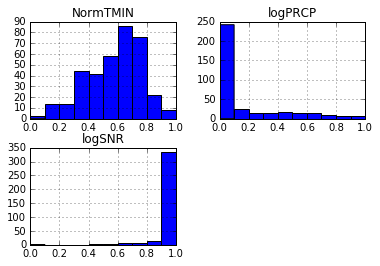

In [32]:
%matplotlib inline

plt.figure

x[stdMeanFeats].hist(bins=10)